# Đọc dữ liệu

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_name = r'/content/drive/MyDrive/graph.xlsx'

In [3]:
import pandas as pd

df_node = pd.read_excel(file_name,sheet_name='Nodes')
df_edge = pd.read_excel(file_name,sheet_name='Edges')

In [4]:
df_node.head()

,id,name_nodes,h
0,0,A,14
1,1,B,0
2,2,C,15
3,3,D,6
4,4,E,8


In [5]:
df_edge.head()

,id,node_start,node_end,weight
0,0,A,C,9
1,1,A,F,20
2,2,A,D,7
3,3,A,E,13
4,4,C,H,6


In [24]:
import heapq

class Node:
    def __init__(self, name, par=None, dist=float('inf')):
        self.name = name        # Tên hoặc định danh của node
        self.par = par          # Node cha (để truy vết lại đường đi)
        self.dist = dist        # Khoảng cách từ node nguồn đến node hiện tại

class Graph:
    def __init__(self):
        self.graph = {}  # Sử dụng dictionary để lưu trữ đồ thị

        # Thêm các node vào đồ thị
    def add_node(self, node):
        self.graph[node.name] = node

    def add_edge(self, u, v, weight):
        # Thêm cạnh từ u đến v với trọng số weight
        if u not in self.graph:
            self.graph[u] = []
        self.graph[u].append((v, weight))

        # Đồ thị vô hướng, thêm cạnh ngược lại
        if v not in self.graph:
            self.graph[v] = []
        self.graph[v].append((u, weight))

    def get_neighbors(self, node):
        # Lấy danh sách các đỉnh kề với node
        return self.graph.get(node)

    def display(self):
        # Hiện thị graph
        for node, neighbors in self.graph.items():
            print(f"{node}: {neighbors}")

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v, weight):
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))  # Đồ thị vô hướng

    def get_neighbors(self, node):
        return self.graph.get(node, [])

class Dijkstra:
    def __init__(self, graph):
        self.graph = graph

    def shortest_path(self, start, end):
        distances = {node: float('inf') for node in self.graph.graph}
        distances[start] = 0

        priority_queue = [(0, start)]

        visited = set()
        parents = {node: None for node in self.graph.graph}

        while priority_queue:
            current_distance, current_node = heapq.heappop(priority_queue)

            if current_node in visited:
                continue

            visited.add(current_node)

            # Dừng lại nếu tìm thấy đích
            if current_node == end:
                return distances[end], self.get_path(parents, end)

            for neighbor, weight in self.graph.get_neighbors(current_node):
                distance = current_distance + weight

                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    parents[neighbor] = current_node
                    heapq.heappush(priority_queue, (distance, neighbor))

        return float('inf'), []

    def get_path(self, parents, target):
        path = []
        while target is not None:
            path.append(target)
            target = parents[target]
        path.reverse()
        return path

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

class GraphVisualizer:
    def __init__(self, graph):
        """Initialize the visualizer with the graph structure."""
        self.graph = graph

    def visualize(self, path=None):
        """Display the graph and optionally highlight a path."""
        G = nx.Graph()
        for v_from in self.graph:
            for v_to, weight in self.graph[v_from]:
                G.add_edge(v_from, v_to, weight=weight)

        position = nx.spring_layout(G,seed=42)
        plt.figure(figsize=(7, 7))

        # Draw nodes and edges
        node_color = [(0.77, 0.69, 1)] * len(G.nodes)
        nx.draw_networkx_nodes(G, position, node_size=400, node_color=node_color)
        nx.draw_networkx_edges(G, position, edgelist=G.edges(), width=1, alpha=0.5)
        edge_labels = {(v_to, v_from): d['weight'] for v_to, v_from, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, position, edge_labels=edge_labels, font_size=10)

        # Draw labels
        nx.draw_networkx_labels(G, position, font_size=12, font_color=(0.07, 0, 0.62))

        # Highlight path if given
        if path:
            path_edges = list(zip(path, path[1:]))
            edges_color = [(0.29, 0.26, 0.89)] * len(G.edges)
            nx.draw_networkx_edges(G, position, edgelist=path_edges, width=3, edge_color=edges_color)
            nx.draw_networkx_edge_labels(G, position, edge_labels=edge_labels, font_size=10)

        plt.title('Đồ thị' + (' với đường đi ngắn nhất được tô màu' if path else ''))
        plt.show();

Start: a
End: m


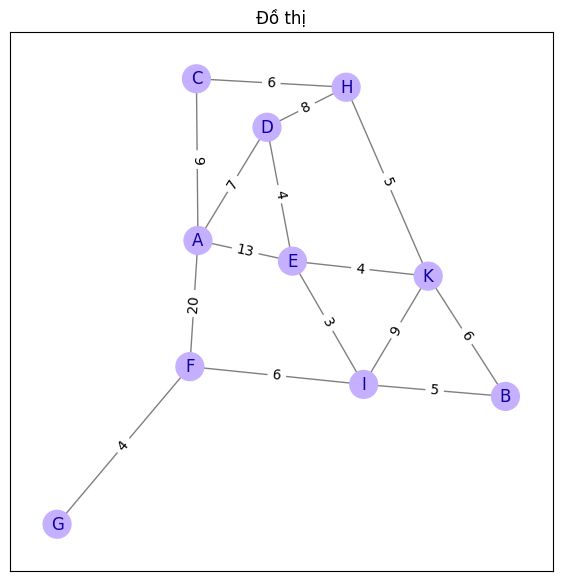

Không có đường đi từ A đến M


In [28]:
# Tạo đồ thị từ DataFrame
graph = Graph()

for index, row in df_edge.iterrows():
    graph.add_edge(row['node_start'], row['node_end'], row['weight'])


dijkstra = Dijkstra(graph)
start_node = input('Start: ').upper()
end_node = input('End: ').upper()
distance, path = dijkstra.shortest_path(start_node, end_node)

visualizer = GraphVisualizer(graph.graph)
visualizer.visualize(path=path)

if distance != float('inf'):
  print(f'Chi phí đi từ {start_node} tới {end_node}: {distance}\nĐường đi: {" -> ".join(path)}')
else:
  print(f'Không có đường đi từ {start_node} đến {end_node}')